In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt
from typing import Tuple

In [ ]:
model = tf.keras.applications.ResNet50V2(weights=None, classes=361)

In [ ]:
import tensorflow_datasets as tfds

tfds.folder_dataset.ImageFolder

tensorflow_datasets.core.folder_dataset.image_folder.ImageFolder

In [ ]:
tfds.__version__

'4.8.3'

In [ ]:
model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import make_grid
import torchvision
from torchvision import models

import time

import os, shutil

In [ ]:
pwd

'/content'

In [ ]:
ls

drive/  sample_data/


In [ ]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [ ]:
Resnet50 = models.resnet50(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
print(Resnet50)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
means, stds = (0.485, 0.456, 0.406), (0.229, 0.224, 0.225)
data_transforms = transforms.Compose(
            [
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(means, stds),
            ]
        )



In [ ]:
train_transforms = transforms.Compose(
            [
                transforms.RandomResizedCrop(224),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(means, stds),
            ]
        )

In [ ]:
root_train = "./drive/MyDrive/Xilhem/singles_clean/big"
os.listdir(root_train)
'''
adding the files to the drive under the folder name Xilhem
It is organised as follows:
Xilhem:
  singles_clean:
    big:
      no_split
      split

From these folders we remove desktop.ini files (if they are added in case of
MacBook users)
'''

for obj in os.listdir(root_train):
  if obj not in ['split', 'no_split']:
    obj_path = os.path.join(root_train, obj)
    if os.path.isdir(obj_path):
      shutil.rmtree(obj_path)

    else:
      os.remove(obj_path)

train_data = datasets.ImageFolder(root_train, transform=data_transforms)

In [ ]:
from torch.utils.data import DataLoader, Subset, WeightedRandomSampler, Dataset, random_split
from sklearn.model_selection import train_test_split


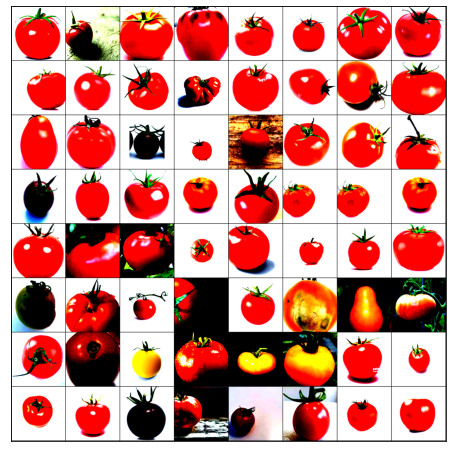

In [ ]:
# visualize data:

visualize_data = datasets.ImageFolder(root_train,
            transform=data_transforms)
visualize_loader = DataLoader(visualize_data, batch_size=64, shuffle=False)

def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid((images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

def show_batch(dl, nmax=64):
    for images, _ in dl:
        show_images(images, nmax)
        break

show_batch(visualize_loader)

In [ ]:
train_idx, val_idx = train_test_split(list(range(len(train_data))), test_size=.3)
train_dataset = Subset(train_data, train_idx)
val_dataset = Subset(train_data, train_idx)

In [ ]:
args={}
kwargs={}
args['batch_size']=200
args['test_batch_size']=100
args['epochs']=50  #The number of Epochs is the number of times you go through the full dataset.
args['lr']=0.005 #Learning rate is how fast it will decend.
args['momentum']=0.5 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).

args['seed']=1 #random seed
args['log_interval']=10
args['cuda']=True

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=args['batch_size'], shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=args['test_batch_size'], shuffle=False)

In [ ]:
import copy

In [ ]:
def train(epoch):

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    model.train()
    total_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        if args['cuda']:
            data, target = data.cuda(), target.cuda()
        #Variables in Pytorch are differenciable.
        #This will zero out the gradients for this batch.
        optimizer.zero_grad()
        output = model(data)
        # Calculate the loss The negative log likelihood loss. It is useful to train a classification problem with C classes.
        loss = nn.CrossEntropyLoss()(output, target)
        total_loss+=loss
        #dloss/dx for every Variable
        loss.backward()
        #to do a one-step update on our parameter.
        optimizer.step()
        #Print out the loss periodically.
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f} \tAccuracy: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss, pred.eq(target.data.view_as(pred)).long().cpu().sum()/len(target)))
    total_loss /= len(train_loader.dataset)
    print('\nTrain set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        total_loss, correct, len(train_loader.dataset),
        100. * correct / len(train_loader.dataset)))

    '''
    # deep copy the model
    # could be uncommented when there is a bigger gpu
    epoch_acc = correct / len(train_loader.dataset)
    if epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model_wts = copy.deepcopy(model.state_dict())

    return best_model_wts
    '''

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        if args['cuda']:
           data, target = data.cuda(), target.cuda()
        output = model(data)
        test_loss += nn.CrossEntropyLoss()(output, target) # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))




In [ ]:
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 2)

model = model.to('cuda')

if args['cuda']:
    model.cuda()

optimizer = optim.Adam(model.fc.parameters(), lr=args['lr'])

for epoch in range(1, args['epochs'] + 1):
    print('epoch: ', epoch)
    train(epoch)
    test()

epoch:  1
Train Epoch: 1 [0/161 (0%)]	Loss: 0.749952 	Accuracy: 0.360248

Train set: Average loss: 0.0047, Accuracy: 58/161 (36%)


Test set: Average loss: 0.0084, Accuracy: 87/161 (54%)

epoch:  2
Train Epoch: 2 [0/161 (0%)]	Loss: 0.454360 	Accuracy: 0.863354

Train set: Average loss: 0.0028, Accuracy: 139/161 (86%)


Test set: Average loss: 0.0229, Accuracy: 84/161 (52%)

epoch:  3
Train Epoch: 3 [0/161 (0%)]	Loss: 0.910471 	Accuracy: 0.527950

Train set: Average loss: 0.0057, Accuracy: 85/161 (53%)


Test set: Average loss: 0.0051, Accuracy: 132/161 (82%)

epoch:  4
Train Epoch: 4 [0/161 (0%)]	Loss: 0.728461 	Accuracy: 0.608696

Train set: Average loss: 0.0045, Accuracy: 98/161 (61%)


Test set: Average loss: 0.0049, Accuracy: 137/161 (85%)

epoch:  5
Train Epoch: 5 [0/161 (0%)]	Loss: 0.622018 	Accuracy: 0.683230

Train set: Average loss: 0.0039, Accuracy: 110/161 (68%)


Test set: Average loss: 0.0105, Accuracy: 95/161 (59%)

epoch:  6
Train Epoch: 6 [0/161 (0%)]	Loss: 0.283872 	Ac

In [ ]:
index_to_class = {v: k for k, v in train_data.class_to_idx.items()}
print (index_to_class)

{0: 'no_split', 1: 'split'}


In [ ]:
def makePrediction(model, url):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    transform = data_transforms

    test_image = Image.open(url)

    plt.imshow(test_image)

    test_image_tensor = transform(test_image)
    test_image_tensor = test_image_tensor.view(1, 3, 224, 224).to(device)
    with torch.no_grad():
        model.eval()
        start = time.time()
        out = model(test_image_tensor)
        end = time.time()
        ps = torch.exp(out)
        print('time taken to evaluate: ', round(end - start, 4), 'seconds')
        topk, topclass = ps.topk(1, dim=1)
        for i in range(1):
            print(f"Prediction {i+1} : {index_to_class[topclass.cpu().numpy()[0][i]]}")

time taken to evaluate:  0.0132 seconds
Prediction 1 : split


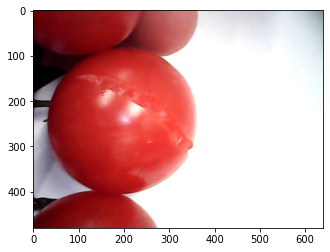

In [ ]:
# input any image path
makePrediction(model, './drive/MyDrive/Xilhem/singles_clean/big/split/split_110.jpg')
